30
0.8680698139624916


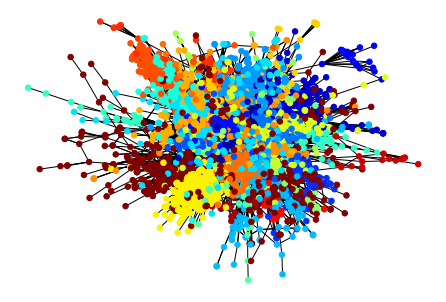

In [2]:
# using community for commDetection
import community
import matplotlib.pyplot as plt
import networkx as nx

# read graph 
G = nx.Graph()
edges = nx.read_edgelist('politician_edges.txt')
G.add_edges_from(edges.edges())
# or construct a grapg
# karate = nx.karate_club_graph()

part = community.best_partition(G)
# compute modularity
mod = community.modularity(part,G)
#number of communities
print(len(set(part.values())))
print(mod)


# Plot, color nodes using community structure
values = [part.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap=plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

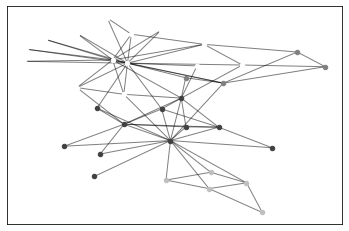

In [3]:
# using community for commDetection with different plotting

import community
import networkx as nx
import matplotlib.pyplot as plt

#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
G = nx.karate_club_graph()


#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

3
0.3806706114398422


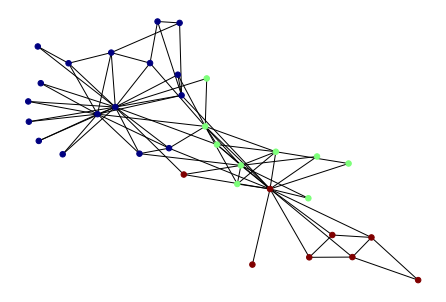

In [4]:
# using networkx for commDetection via greedy_modularity_communities

from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(G))
# sorted(c[0])
# type(c)
# type(c[0])

# convert c to dictionary for computing modularity
k=0
part = {}
for i in c:
    for j in i:
        part[j] = k
    k+=1 
# part  
mod = community.modularity(part,G)

print(len(set(part.values())))
print(mod)

# Plot, color nodes using community structure
values = [part.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap=plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

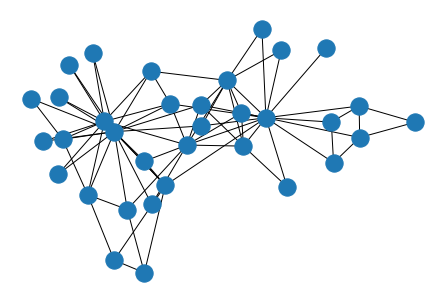

In [8]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import k_clique_communities
G = nx.karate_club_graph()
#c = list(greedy_modularity_communities(G))
#sorted(c[0])
c = list(k_clique_communities(G, 4))
sorted(c[0])
import matplotlib.pyplot as plt
nx.draw(G)
plt.draw()